# Principal Component Analysis

PCA is a dimensionality reduction technique that reduces the number of dimensions in a dataset without sacrificing a commensurate amount of information. It has many practical uses:

1. Reducing high-dimensional data to two or three dimensions so that it can be plotted
2. Reducing the number of dimensions and then restoring the original for annomaly detection and noise filtering
3. Anonymizing a dataset so that it can be shared with others without revealing the nature or meaning of the data

## Understanding Principal Component Analysis

If we take a two dimensionsl dataset as an example, the coordinate system is transformed so that one axis captures most of the variance in the dataset. This is the dataset's primary principal component. The other axis contains a narrower range of values and represents the secondary principal component. The number of principal components equals the number of dimensions in a dataset. PCA finds the two principal componets and eliminates the one with less variance. PCA works by building a covariance matrix that quantifies the variance of each dimension with respect to the others, and from the matrix computing eigenvectors and eigenvalues.

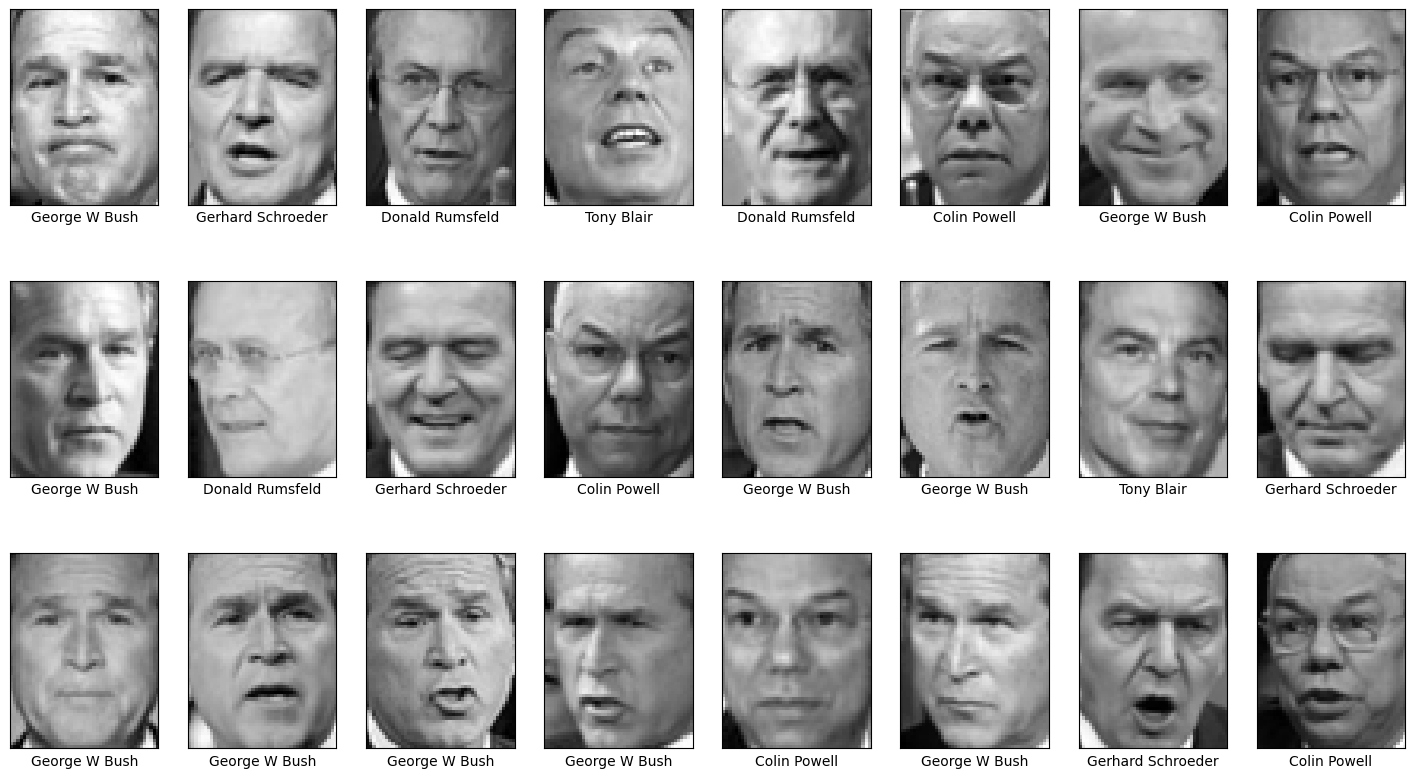

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=100, slice_=None)
faces.images = faces.images[:, 35:97, 39:86]
faces.data = faces.images.reshape(faces.images.shape[0], faces.images.shape[1] * faces.images.shape[2])

fig, ax = plt.subplots(3, 8, figsize=(18, 10))

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

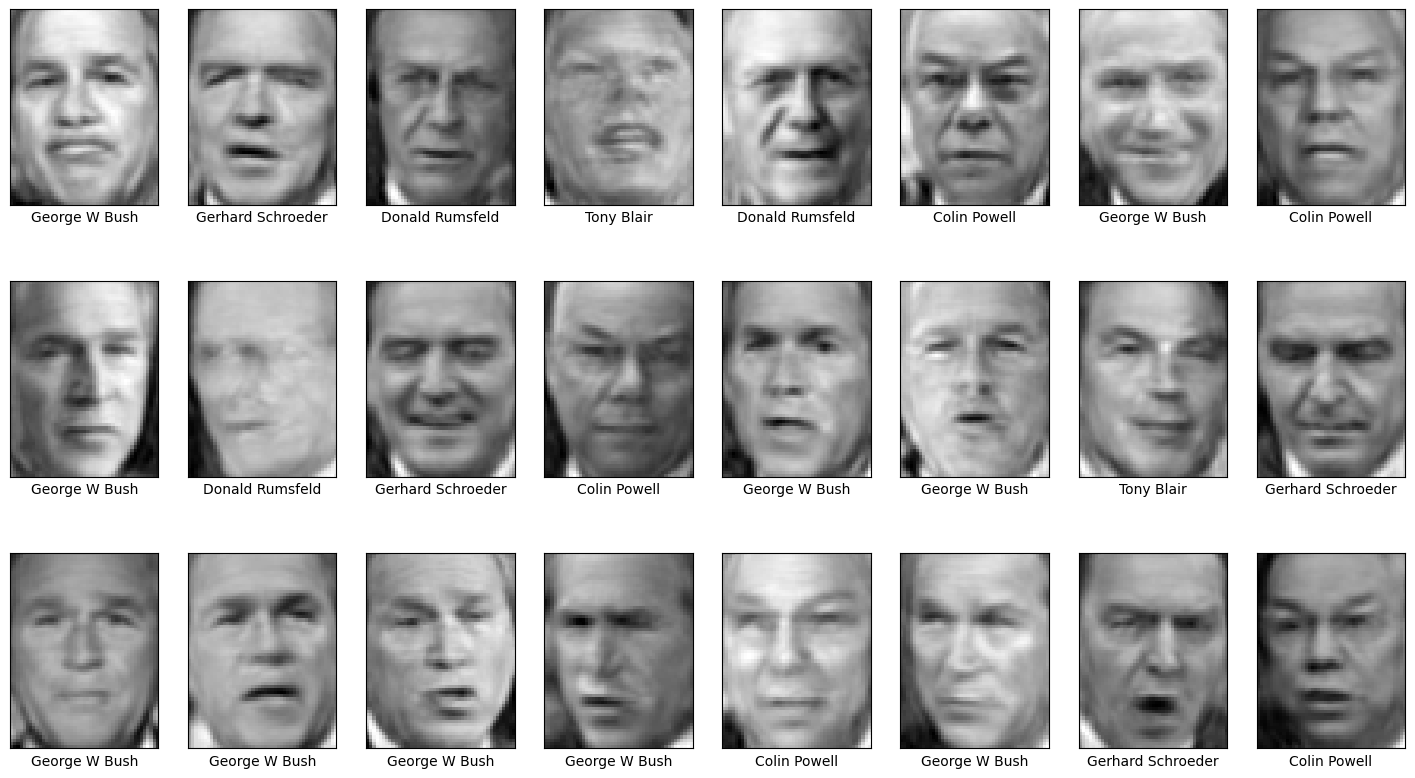

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150, random_state=0)
pca_faces = pca.fit_transform(faces.data)
unpca_faces = pca.inverse_transform(pca_faces).reshape(1140, 62, 47)

fig, ax = plt.subplots(3, 8, figsize=(18,10))

for i, axi in enumerate(ax.flat):
    axi.imshow(unpca_faces[i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

One way to find the optimal number of components is with scree plot, which charts the proportion of explained variance for each dimension.

Text(0, 0.5, 'Explained Variance')

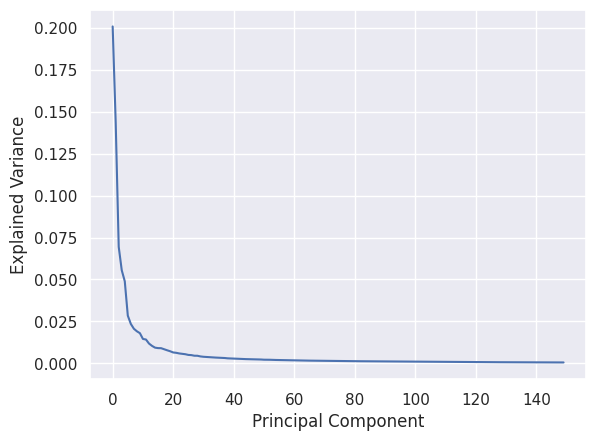

In [3]:
import seaborn as sns
sns.set()

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

Text(0, 0.5, 'Cumulative Explained Variance')

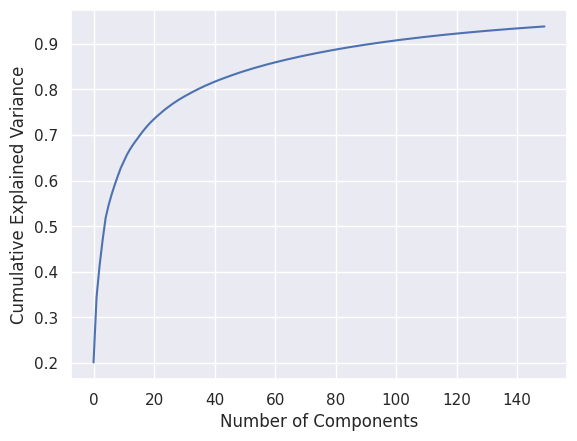

In [4]:
import numpy as np

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

## Filtering Noise

One use of PCA is to filter noise from data. Noise is data which is random, corrupt or meaningless. The basic approach is to PCA-transform the data and invert the transform, reducing the dataset from m dimensions to n and then restoring it to m.

Adding random noise to the LFW dataset to test the supposition above

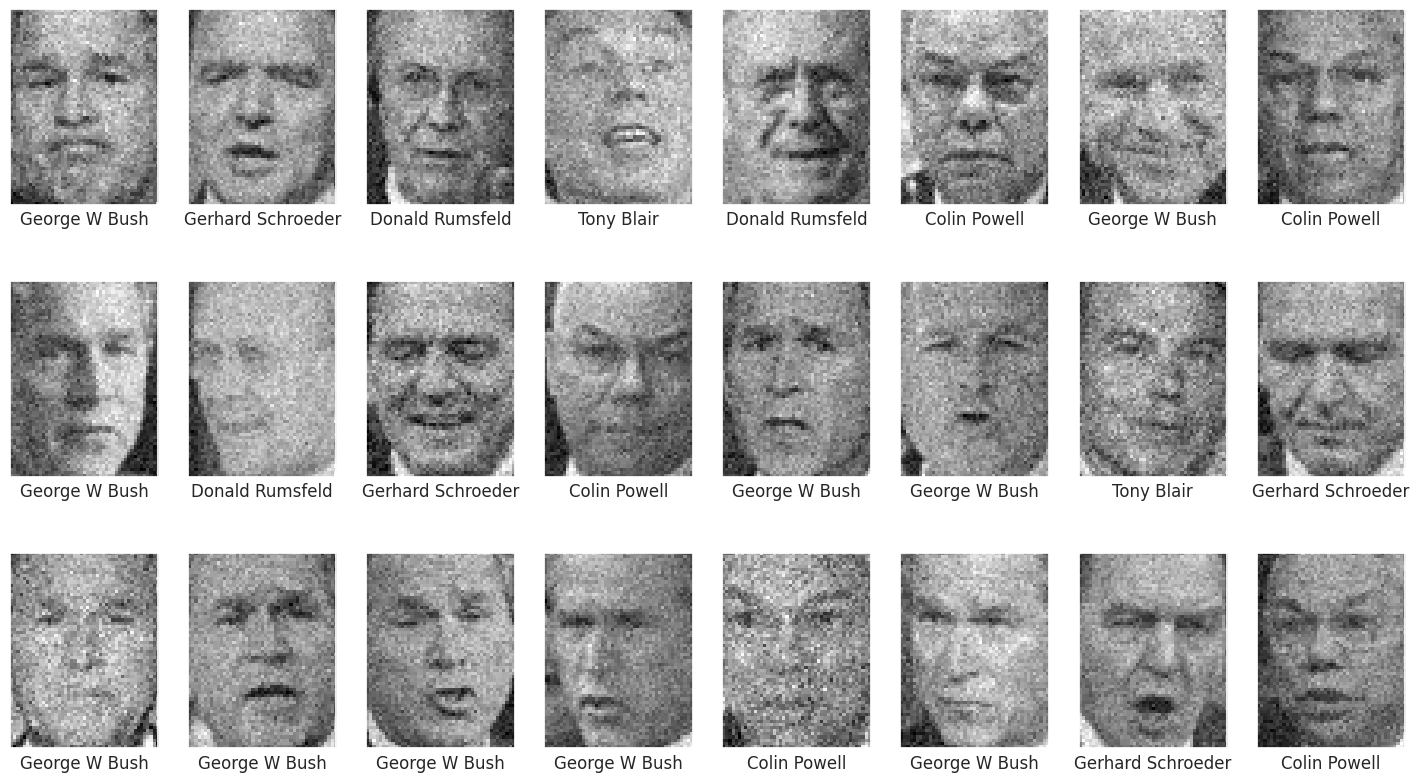

In [5]:
faces = fetch_lfw_people(min_faces_per_person=100, slice_=None)
faces.images = faces.images[:, 35:97, 39:86]
faces.data = faces.images.reshape(faces.images.shape[0], faces.images.shape[1] * faces.images.shape[2])
np.random.seed(0)
noisy_faces = np.random.normal(faces.data, 0.0765)

fig, ax = plt.subplots(3, 8, figsize=(18,10))

for i, axi in enumerate(ax.flat):
    axi.imshow(noisy_faces[i].reshape(62,47), cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [6]:
pca = PCA(0.8, random_state=0)
pca_faces = pca.fit_transform(noisy_faces)
pca.n_components_

np.int64(179)

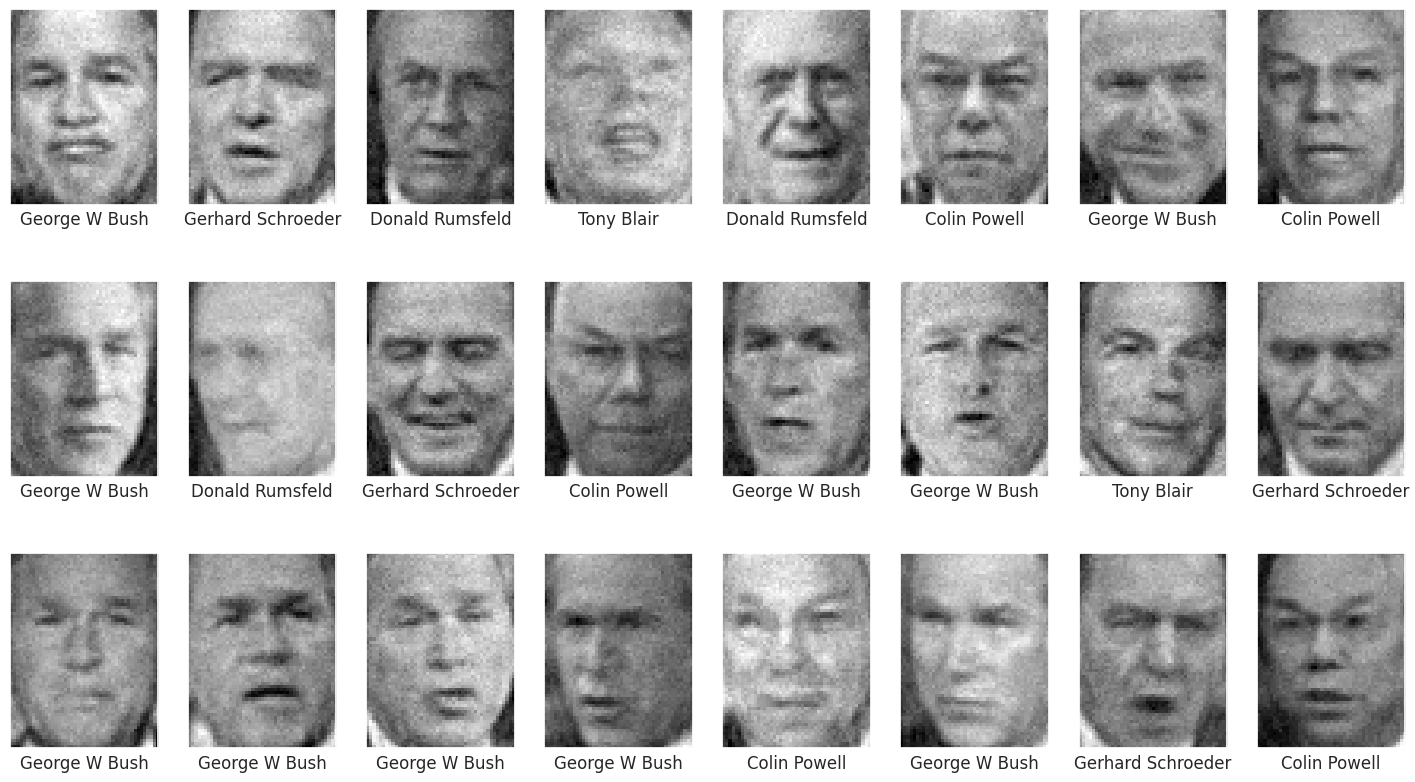

In [7]:
unpca_faces = pca.inverse_transform(pca_faces)

fig, ax = plt.subplots(3,8,figsize=(18,10))

for i, axi in enumerate(ax.flat):
    axi.imshow(unpca_faces[i].reshape(62,47), cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

## Anonymizing Data

In [9]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
pd.set_option('display.max_columns', 6)
df.head()

,mean radius,mean texture,mean perimeter,...,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,...,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,...,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,...,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,...,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,...,0.1625,0.2364,0.07678


In [10]:
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=30, random_state=0)
pca_data = pca.fit_transform(df)

scaler = StandardScaler()
anon_df = pd.DataFrame(scaler.fit_transform(pca_data))
pd.set_option('display.max_columns', 8)
anon_df.head()

,0,1,2,3,...,26,27,28,29
0,1.743043,-3.440692,1.832695,1.179529,...,-1.033900,0.767070,1.406020,0.841434
1,1.906779,0.182972,-1.335313,-2.418269,...,-0.043492,-0.798802,0.484854,-1.267746
2,1.496120,0.458381,-0.064503,-0.568556,...,0.092680,0.010964,-0.547972,0.484234
3,-0.611764,-0.788775,0.327197,1.592188,...,0.008095,0.811865,-1.511794,-1.978890
4,1.397781,2.216483,0.051866,-1.150718,...,1.716566,0.161769,1.260500,0.390467


In [11]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.9999999999999997)